In [23]:
import pandas as pd, numpy as np, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns, sklearn.preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### copy z prvej fazy zadania

In [24]:
df_product = pd.read_csv("product.csv", sep='\t')
df_session = pd.read_csv("session.csv", sep='\t')
df_users = pd.read_csv("user.csv", sep='\t')

print(len(df_product), len(df_session), len(df_users))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_session)

14908 11039 2592


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [25]:
df_nodupuser = df_users
idecka = {}

for id in df_users["user_id"]:
    if id in idecka.keys():
       idecka[id] += 1 
    else:
        idecka[id] = 1
to_remove = []
for row in df_users.iterrows():
    index = row[0]
    user_id = row[1]["user_id"]
    if idecka[user_id] > 1:
        to_remove.append(index)
print(to_remove)
df_nodupuser = df_nodupuser.drop(to_remove)
print(len(df_users), len(df_nodupuser))
df_nodupuser.reset_index()

[0, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 20, 21, 22, 25, 26, 28, 31, 32, 33, 37, 38, 39, 41, 43, 44, 45, 46, 47, 49, 50, 51, 53, 56, 57, 58, 59, 62, 64, 65, 66, 67, 68, 69, 71, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 92, 94, 97, 100, 101, 102, 107, 109, 111, 114, 115, 116, 117, 118, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 136, 138, 139, 140, 141, 144, 145, 148, 149, 151, 152, 153, 154, 155, 156, 160, 162, 163, 164, 165, 166, 168, 169, 174, 175, 176, 177, 182, 184, 186, 187, 190, 191, 192, 194, 196, 198, 202, 205, 206, 207, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 235, 236, 237, 240, 241, 242, 243, 244, 247, 248, 249, 250, 252, 253, 259, 260, 261, 262, 263, 265, 266, 267, 268, 271, 272, 273, 274, 276, 277, 278, 281, 282, 283, 284, 285, 286, 287, 288, 292, 293, 296, 299, 300, 301, 302, 303, 305, 306, 307, 308, 309, 310, 311, 313, 315, 316, 318, 320, 321, 322, 323, 325, 326, 328, 329, 330, 332, 33

,index,race,username,sex,residence,user_id,name,address,mail,current_location,registration,birthdate
0,1,unspecified,pirescarolina,F,NaN,2066,Pietra Castro,"Campo de Araújo, 606\nMonte São José\n57558095...",gomesana@yahoo.com.br,"(Decimal('28.1621345'), Decimal('-173.517410'))",2021-08-09,NaN
1,2,NaN,maskovalucie,NaN,NaN,1023,Růžena Pospíšilová,Kremnická 66\n518 24 Žacléř,pavelfiala@post.cz,"(Decimal('-80.913702'), Decimal('21.046467'))",2020/08/06,1921-09-21
2,9,NaN,gda-cruz,NaN,NaN,2061,Emanuel da Conceição,NaN,gmonteiro@yahoo.com.br,"(Decimal('89.734118'), Decimal('-103.039006'))","11/07/2018, 00:00:00",2000-11-28
3,11,NaN,trommlerleonie,M,NaN,96,Leo Hiller-Holt,Täschering 491\n69752 Eberswalde,daniellesontag@gmx.de,"(Decimal('-81.5533295'), Decimal('-72.476163'))",12 Jan 2014,1937-11-17
4,12,NaN,igorcostela,NaN,NaN,1196,Beatriz Carvalho,"Loteamento Nathan Melo, 8\nSantana Do Cafezal\...",fogacaluiz-otavio@bol.com.br,"(Decimal('80.7165165'), Decimal('-17.568838'))",25 Nov 2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
944,2575,NaN,smithcarmen,M,"564 Andrea Freeway Suite 701\nWilliamsmouth, N...",1201,Keith Patton DDS,04212 Melvin Mountain Suite 359\nSouth Douglas...,elizabeth32@hotmail.com,"(Decimal('-70.997122'), Decimal('156.990661'))",2021-01-12,1975-01-27
945,2578,NaN,wbarber,M,NaN,1551,Eduardo Johnson,"408 Davis Junction Apt. 020\nMejiaside, PA 62823",hvilla@hotmail.com,"(Decimal('35.572745'), Decimal('13.032466'))","03/31/2018, 00:00:00",1951-11-07
946,2581,NaN,xwatanabe,F,NaN,2093,松本 香織,岩手県山武郡九十九里町虎ノ門虎ノ門ヒルズ森タワー4丁目24番12号 ハイツ港南664,yamamotorika@yahoo.com,"(Decimal('-12.9191985'), Decimal('-21.733244'))",14 Oct 2013,2019-02-17
947,2583,white,nogueiragabriel,NaN,NaN,2511,Arthur Cardoso,NaN,correiaalana@bol.com.br,"(Decimal('-39.812127'), Decimal('0.187696'))","07/05/2022, 00:00:00",1968-08-08


In [26]:
df_merged = df_session.merge(df_nodupuser, how="inner")
df_merged

,session_id,session_duration,pct_mouse_click,pct_mouse_move,pct_scrandom,browser_name,pct_scroll_move,wild_mouse_duration,total_load_time,screen_width,...,race,username,sex,residence,name,address,mail,current_location,registration,birthdate
0,223045,47.96486,11.32534,11.29606,48.47653,firefox,48.95236,11.39144,2.30071,1280,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
1,623734,132.25714,11.88174,11.58618,25.58663,safari,51.07750,9.44179,1.84508,lower,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
2,159057,143.60687,7.83379,2.92107,70.63719,opera,41.89119,10.05044,2.92902,lower,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
3,551040,248.09308,4.95972,4.52411,48.16995,opera,54.76994,9.96582,8.07877,1366,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
4,6355,165.90198,11.27945,14.79490,49.78113,chrome,44.72991,8.48023,2.04936,800,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,817978,168.30985,13.22728,13.23870,59.44815,edge,43.64091,11.70369,1.05211,1280,...,asian,ccerna,M,Pyšelská 1\n369 25 Žamberk,Miloslav Dušek,NaN,krejcovabohumila@centrum.cz,"(Decimal('39.6622325'), Decimal('-62.817658'))","12/10/2021, 00:00:00",1964-12-12
4071,992036,172.54963,11.39298,14.91608,41.20110,edge,47.24597,9.50976,2.63677,higher,...,NaN,agnolosanguineti,NaN,NaN,Sig. Micheletto Dalla,"Contrada Roman, 975 Appartamento 5\n00127, Mez...",paloma99@gmail.com,"(Decimal('73.519198'), Decimal('-116.041196'))","03/16/2017, 00:00:00",1965-11-23
4072,856525,92.97564,9.92790,7.32274,59.13477,chrome,58.16094,10.43395,5.45315,800,...,NaN,milena14,F,NaN,Bianca Fogaça,NaN,sarahcardoso@ig.com.br,"(Decimal('89.4235045'), Decimal('-41.293519'))",2018-06-20,2006-09-19
4073,472623,54.60196,10.88118,11.77482,44.68072,chrome,57.48251,7.80662,4.27341,1280,...,NaN,milena14,F,NaN,Bianca Fogaça,NaN,sarahcardoso@ig.com.br,"(Decimal('89.4235045'), Decimal('-41.293519'))",2018-06-20,2006-09-19


In [27]:
# rrrr-mm-dd
# rrrr/mm/dd
# mm/dd/rrrr, 00:00:00
# dd Mes rrrr

def get_format(date):
    months = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}
    if len(date.split("-")) == 3:
        splitted = date.split("-")
        rok = splitted[0]
        mesiac = splitted[1]
        den = splitted[2]
    elif len(date.split("/")) == 3:
        splitted = date.split("/")
        if len(splitted[2]) > 4:
            mesiac = splitted[0]
            den = splitted[1]
            rok = splitted[2][:4]
        else:
            rok = splitted[0]
            mesiac = splitted[1]
            den = splitted[2]
    elif len(date.split(" ")) == 3:
        splitted = date.split(" ")
        den = splitted[0]
        mesiac = months[splitted[1]]
        rok = splitted[2]
    return f"{rok}-{mesiac}-{den}"

for row in df_merged.iterrows():
    datum = get_format(row[1]["registration"])
    df_merged.at[row[0], "registration"] = datum


# Integrácia a čistenie dát
#### odstránenie pozorovaní s chýbajúcimi údajmi
- pokiaľ chýba údaj o dátume narodenia, hypotéza, ktorá hovorí, že ľudia vo veku 40-65 rokov nakupujú viac, nemôže byť na takéto dáta uplatnená. V tomto prípade je vhodné dáta vymazať.
#### nahradenie chýbajúcej hodnoty priemerom
- ostatné numerické hodnoty je možné nahradiť priemerom

In [28]:
def remove_missing_rows(df):
    for column in df.columns():
        df = df_merged.dropna(subset=[column])
    return df


def replace_missing_numeric(df):
    """
    :param df: dataframe
    :return: dataframe with replaced empty values of numerical columns with average of that column
    """
    for column in df.columns:

        if pd.api.types.is_numeric_dtype(df[column]):
            print(column)
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
    return df

removed_na = remove_missing_rows(df_merged.copy())
df_merged = replace_missing_numeric(df_merged)
len(df_merged)

session_id
session_duration
pct_mouse_click
pct_mouse_move
pct_scrandom
pct_scroll_move
wild_mouse_duration
total_load_time
scroll_move_total_rel_distance
pct_rage_click
pct_click_product_info
pct_scroll_move_duration
product_ean
ack
pct_wild_mouse
pct_doubleclick
pct_input
mouse_move_total_rel_distance
page_activity_duration
user_id
pct_click


C:\Users\Samo\AppData\Local\Temp\ipykernel_27784\2163785529.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(mean_value, inplace=True)


2198

# Integrácia a čistenie dát
#### odstránenie vychýlených (odľahlých) pozorovaní
- odstrániť údaje je vhodné napríklad, ak je session_duration príliš veľké alebo malé.
#### nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (napr. 5%, 95%)
- nahradenie outlierov meanom daného stĺpca

In [31]:
def remove_outliers_for_num_column(df, bottom, top, all=False, column_names=None):
    """
    :param df: dataframe
    :param column_names: list/tuple of columns to process
    :param bottom: lower quantile bound, 0-1
    :param top: upper quantile bound, 0-1
    :param all: True if this should be done for all columns
    :return: dataframe without outliers
    """
    if all:
        for column in df.select_dtypes(include=['number']).columns:
            if column == 'session_id' or column == "user_id":
                continue
            lower_percentile = df[column].quantile(bottom)
            upper_percentile = df[column].quantile(top)
            print(column, lower_percentile, upper_percentile)
            df = df[(df[column] >= lower_percentile) & (df[column] <= upper_percentile)]
    else:
        for column in column_names:
            if column == 'session_id' or column == "user_id":
                continue
            if not pd.api.types.is_numeric_dtype(df['column']):
                continue
            lower_percentile = df[column].quantile(bottom)
            upper_percentile = df[column].quantile(top)
            print(column, lower_percentile, upper_percentile)
            df = df[(df[column] >= lower_percentile) & (df[column] <= upper_percentile)]
    return df

def replace_outliers_for_num_column(df, bottom, top, all=False, column_names=None):
    """
    :param df: dataframe
    :param column_names: list/tuple of columns to process
    :param bottom: lower quantile bound, 0-1
    :param top: upper quantile bound, 0-1
    :param all: True if this should be done for all columns
    :return: dataframe with replaced outliers
    """
    if all:
        for column in df.select_dtypes(include='number').columns:

            if column == 'session_id' or column == "user_id":
                continue
            lower_percentile = df[column].quantile(bottom)
            upper_percentile = df[column].quantile(top)
            mean_value = df[(df[column] >= lower_percentile) & (df[column] <= upper_percentile)][column].mean()
            mask = (df[column] < lower_percentile) | (df[column] > upper_percentile)
            df.loc[mask, column] = mean_value
    else:
        for column in column_names:
            if column == 'session_id' or column == "user_id":
                continue
            if not pd.api.types.is_numeric_dtype(df[column]):
                continue
            lower_percentile = df[column].quantile(bottom)
            upper_percentile = df[column].quantile(top)
            mean_value = df[(df[column] >= lower_percentile) & (df[column] <= upper_percentile)][column].mean()

            mask = (df[column] < lower_percentile) | (df[column] > upper_percentile)
            df.loc[mask, column] = mean_value
    return df
test = remove_outliers_for_num_column(df_merged.copy(), 0.05, 0.95, all=True)
test2 = replace_outliers_for_num_column(df_merged.copy(), 0.05, 0.95, all=True)

test2

session_duration 54.0002955 251.10286050000002
pct_mouse_click 6.821413 13.6878025
pct_mouse_move 3.8766749999999996 14.486923999999998
pct_scrandom 30.364657500000003 69.726288
pct_scroll_move 28.527631 73.030419
wild_mouse_duration 8.430175 11.63149
total_load_time 0.794565 9.7557375
scroll_move_total_rel_distance 8.3385125 11.702701
pct_rage_click 26.3074795 74.37876199999998
pct_click_product_info 37.7962925 78.106785
pct_scroll_move_duration 7.379872000000001 13.2046865
product_ean 392637420784.6 9508502701125.4
ack 0.0 1.0
pct_wild_mouse 30.1170565 73.2281895
pct_doubleclick 7.110667 13.738267499999996
pct_input 0.752005 10.8833675
mouse_move_total_rel_distance 6.5887875 13.2798425
page_activity_duration 5.9214635 12.246381499999998
pct_click 7.472037 13.223966500000001
skipping
session_duration
0        True
1       False
2       False
3       False
4       False
        ...  
4070    False
4071    False
4072    False
4073    False
4074    False
Name: session_duration, Length: 2

C:\Users\Samo\AppData\Local\Temp\ipykernel_27784\996091414.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5110339395612.946' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, column] = mean_value


,session_id,session_duration,pct_mouse_click,pct_mouse_move,pct_scrandom,browser_name,pct_scroll_move,wild_mouse_duration,total_load_time,screen_width,...,race,username,sex,residence,name,address,mail,current_location,registration,birthdate
0,223045,152.135253,11.325340,11.296060,48.47653,firefox,48.95236,11.391440,2.30071,1280,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
1,623734,132.257140,11.881740,11.586180,50.36348,safari,51.07750,9.441790,1.84508,lower,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
2,159057,143.606870,7.833790,9.751855,50.36348,opera,41.89119,10.050440,2.92902,lower,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
3,551040,248.093080,10.837007,4.524110,48.16995,opera,54.76994,9.965820,8.07877,1366,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
4,6355,165.901980,11.279450,9.751855,49.78113,chrome,44.72991,8.480230,2.04936,800,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,817978,168.309850,13.227280,13.238700,59.44815,edge,43.64091,9.971651,1.05211,1280,...,asian,ccerna,M,Pyšelská 1\n369 25 Žamberk,Miloslav Dušek,NaN,krejcovabohumila@centrum.cz,"(Decimal('39.6622325'), Decimal('-62.817658'))",2021-12-10,1964-12-12
4071,992036,172.549630,11.392980,9.751855,41.20110,edge,47.24597,9.509760,2.63677,higher,...,NaN,agnolosanguineti,NaN,NaN,Sig. Micheletto Dalla,"Contrada Roman, 975 Appartamento 5\n00127, Mez...",paloma99@gmail.com,"(Decimal('73.519198'), Decimal('-116.041196'))",2017-03-16,1965-11-23
4072,856525,92.975640,9.927900,7.322740,59.13477,chrome,58.16094,10.433950,5.45315,800,...,NaN,milena14,F,NaN,Bianca Fogaça,NaN,sarahcardoso@ig.com.br,"(Decimal('89.4235045'), Decimal('-41.293519'))",2018-06-20,2006-09-19
4073,472623,54.601960,10.881180,11.774820,44.68072,chrome,57.48251,9.971651,4.27341,1280,...,NaN,milena14,F,NaN,Bianca Fogaça,NaN,sarahcardoso@ig.com.br,"(Decimal('89.4235045'), Decimal('-41.293519'))",2018-06-20,2006-09-19


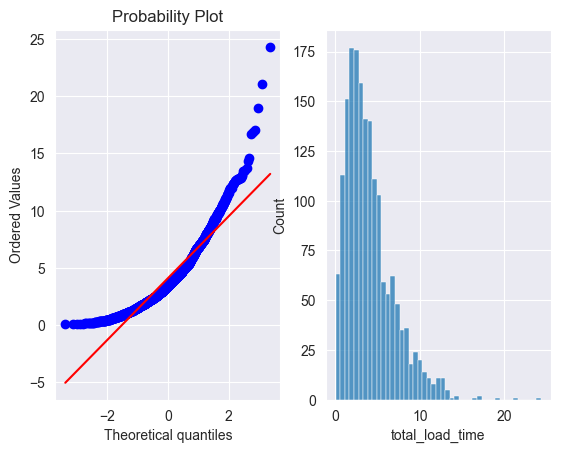

0.6706526875495911


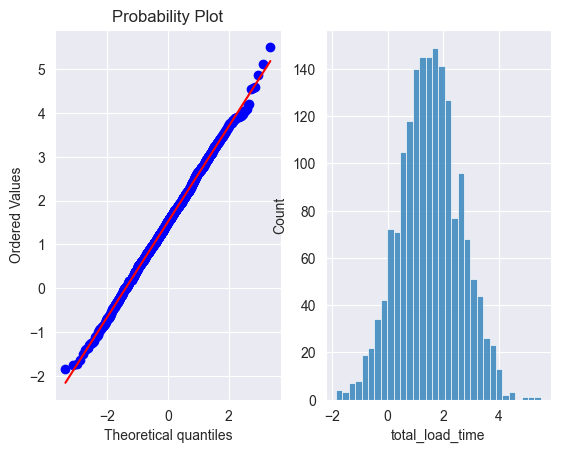

array([[0.16619098, 0.7257626 ],
       [0.18974903, 0.68275064],
       [0.26552868, 0.50771745],
       ...,
       [0.11480711, 0.55560968],
       [0.03599031, 0.56261897],
       [0.25278763, 0.43190275]])

In [30]:
df_merged
predictor = df_merged['ack'].copy()
independants = df_merged.drop('ack',axis=1).copy()
independants_train, independants_test, predictor_train, predictor_test = train_test_split(independants,predictor, test_size=0.2,random_state=42)
predictor_train = predictor_train.reset_index().drop('index',axis=1)
predictor_test = predictor_test.reset_index().drop('index',axis=1)
independants_train = independants_train.reset_index().drop('index',axis=1)
independants_test = independants_test.reset_index().drop('index',axis=1)

def qq_compare(df, column):
    plt.subplot(1,2,1)
    stats.probplot(df[column], dist='norm',plot=plt)
    plt.subplot(1,2,2)
    sns.histplot(df[column])
    plt.show()

qq_compare(independants_train, 'total_load_time')

def best_tranform(df, column):
    best_trans = pd.DataFrame()
    curr_best_p = 0
    #uskutocnenie vsetkych transformacii
    log_t = pd.DataFrame(np.log(df[column]))
    inv_t = pd.DataFrame(1/(df[column]))
    pow_half_t = pd.DataFrame((df[column])**(1/2))
    pow_pointtwo_t = pd.DataFrame((df[column])**(1/1.2))
    boxcox_t = pd.DataFrame(df[column])
    boxcox_t[column],param = stats.boxcox(boxcox_t[column])

    transf_list = [log_t, inv_t, pow_half_t, pow_pointtwo_t,boxcox_t]

    for df in transf_list:
        p_val = stats.shapiro(df).pvalue
        if p_val > curr_best_p:
            curr_best_p = p_val
            best_trans = df
    print(curr_best_p)
    return best_trans

qq_compare(best_tranform(independants_train,'total_load_time'), 'total_load_time')

def scaler(type, df):
    min_max = MinMaxScaler()
    if type == 'train':
        df_scaled = min_max.fit_transform(df)
    else:
        df_scaled = min_max.transform(df)
    return df_scaled
independants_train_scaled = scaler('train', independants_train[['total_load_time','session_duration']])

independants_train_scaled
